In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [12]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [18]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

C:\Users\dvnsh\AppData\Local\Temp\ipykernel_17992\600951975.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df,palette="viridis")


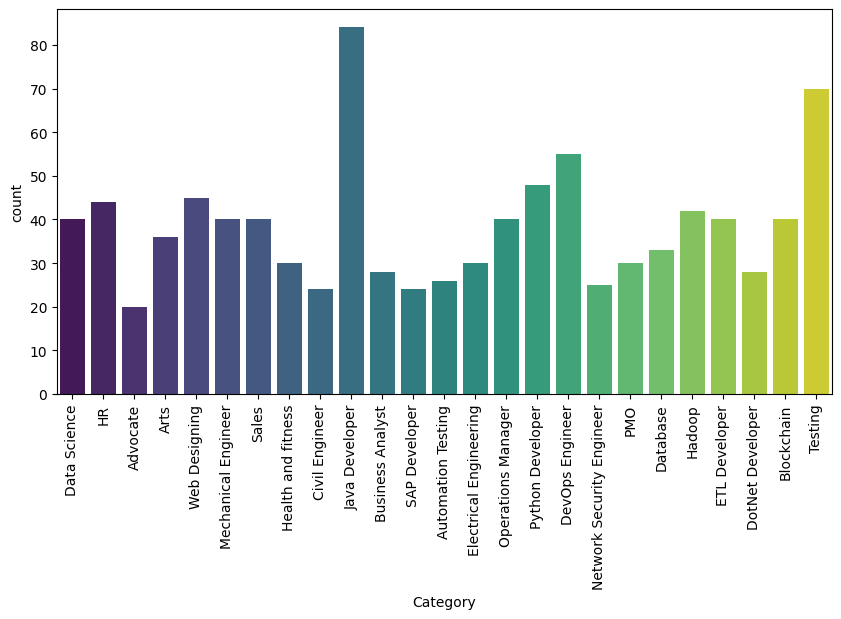

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='Category', data=df,palette="viridis")
plt.xticks(rotation = 90)
plt.show()

In [27]:
df['Category'][0]

'Data Science'

In [26]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [46]:
import re
def cleanResume(txt):
    cleanTxt = re.sub(r'http\S+',' ',txt)
    cleanTxt = re.sub(r'@\S+',' ',cleanTxt)
    cleanTxt = re.sub(r'#\S+',' ',cleanTxt)
    cleanTxt = re.sub(r'[%s]' % re.escape("""!"$*()+-_,<>{}.[]^|?&;="""),' ',cleanTxt)
    cleanTxt = re.sub(r'\s+',' ',cleanTxt)   
    return cleanTxt

In [70]:
cleanResume("My http:\\mywebsite hello ####### !@#$%^&*.()_+{\}|:<>?-=[];',./' world")

<>:1: SyntaxWarning: invalid escape sequence '\}'
<>:1: SyntaxWarning: invalid escape sequence '\}'
C:\Users\dvnsh\AppData\Local\Temp\ipykernel_17992\161892549.py:1: SyntaxWarning: invalid escape sequence '\}'
  cleanResume("My http:\\mywebsite hello ####### !@#$%^&*.()_+{\}|:<>?-=[];',./' world")


'My hello world'

In [71]:
df['Resume'] = df['Resume'].apply(lambda x:cleanResume(x))

In [72]:
df['Resume'][0]

'Skills Programming Languages: Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript/JQuery Machine learning: Regression SVM NaÃ¯ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations: Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others: Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in acceleratin

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df['Category'] = le.fit_transform(df['Category'])
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])
requiredText

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 164274 stored elements and shape (962, 7384)>

In [19]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(requiredText,df['Category'],test_size = 0.2,random_state=42)

In [38]:
Y_test

344    15
381    15
351    15
778    13
277    14
       ..
551    20
33      6
31      6
716     7
941    23
Name: Category, Length: 193, dtype: int64

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [39]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print(Y_pred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [41]:
print("Accuracy:\n",accuracy_score(Y_test,Y_pred))

Accuracy:
 0.9844559585492227


In [42]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [71]:
myResume = """Rohan Verma
Hyderabad, India
Phone: +91-9XXXXXXXXX
Email: rohan.verma@email.com
PROFESSIONAL SUMMARY
Cyber Security Analyst with strong knowledge of network security, vulnerability assessment, and
ethical hacking concepts.
TECHNICAL SKILLS
Security: CIA Triad, OWASP Top 10, Threat Modeling
Networking: TCP/IP, DNS, HTTP/HTTPS, Firewalls, VPN
Tools: Wireshark, Nmap, Burp Suite, Metasploit, Nessus
OS: Linux (Kali, Ubuntu), Windows
Scripting: Python, Bash, SQL
EXPERIENCE
Cyber Security Analyst – SecureNet Solutions (Aug 2023 – Present)
• Vulnerability scanning and penetration testing
• Log monitoring and incident response
Cyber Security Intern – CyberShield Technologies (Jan 2023 – Jun 2023)
• Web application security testing
• Assisted SOC team operations
PROJECTS
Web Application Penetration Testing – Burp Suite, OWASP ZAP
Network Traffic Analysis – Wireshark
Password Cracking & Defense – Hashcat, John the Ripper
EDUCATION
B.Tech in Computer Science (2019–2023)
CGPA: 8.1/10
CERTIFICATIONS
• CEH (Training Completed)
• Google Cybersecurity Certificate
• Cisco Cybersecurity Essentials
"""

In [74]:
clf = pickle.load(open('clf.pkl','rb'))
cleaned_resume = cleanResume(myResume)
input = tfidf.transform([cleaned_resume])
prediction = clf.predict(input)
categories = {
    6:"Data Science",12:"HR",0:"Advocate",1:"Arts",24:"Web Designing",16:"Mechanical Engineer",22:"Sale",14:"Health and Fitness",5:"Civil Engineer",15:"Java Developer",4:"Business Analyst",21:"SAP Developer",
    2:"Automation Tesing",11:"Electrical Engineer",18:"Operations Manager",20:"Python Developer",8:"DevOps Engineer",17:"Network and Security Engineer",19:"PMO",7:"Database",13:"Hadoop",10:"ETL Developer",9:"DotNet Developer",3:"Blockchain",23:"Testing"
}
category_predicted = categories.get(prediction[0])

print("Predicted Category:",category_predicted)

Predicted Category: Network and Security Engineer
